In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from skimage import color
from keras.callbacks import EarlyStopping

import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score 

In [ ]:
import csv
import math as m
l1 = 50
l2 = 40
with open('Robot2b.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','Px','Py'])

  for tt1 in range(-160,161,1):
    for tt2 in range(-160,161,1):
      Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2)
      Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2)
      writer.writerow([tt1,tt2,Px,Py])

In [ ]:
data=pd.read_csv('Robot2b.csv')
data

,tt1,tt2,Px,Py
0,-160,-160,-12.633261,6.154954
1,-160,-159,-43.661722,28.699737
2,-160,-158,-79.397252,14.771185
3,-160,-157,-86.984769,-22.824854
4,-160,-156,-59.448345,-49.522757
...,...,...,...,...
103036,160,156,-59.448345,49.522757
103037,160,157,-86.984769,22.824854
103038,160,158,-79.397252,-14.771185
103039,160,159,-43.661722,-28.699737


In [ ]:
x=data.drop(data.columns[:2],axis=1)

In [ ]:
y=data.drop(data.columns[2:],axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [ ]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(2,)))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               1536      
                                                                 
 dense_11 (Dense)            (None, 500)               256500    
                                                                 
 dense_12 (Dense)            (None, 300)               150300    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 2)                 202       
                                                                 
Total params: 438,638
Trainable params: 438,638
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size = 128,epochs=50,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data = (x_test, y_test))

Epoch 1/50
604/604 [==============================] - 11s 17ms/step - loss: -425.2617 - accuracy: 0.5001 - val_loss: -1041.5071 - val_accuracy: 0.5010
Epoch 2/50
604/604 [==============================] - 10s 16ms/step - loss: -17638.0684 - accuracy: 0.5001 - val_loss: -18660.6465 - val_accuracy: 0.4941
Epoch 3/50
604/604 [==============================] - 10s 16ms/step - loss: -180208.8125 - accuracy: 0.4999 - val_loss: -133504.8125 - val_accuracy: 0.5003
Epoch 4/50
604/604 [==============================] - 10s 16ms/step - loss: -1571573.2500 - accuracy: 0.5027 - val_loss: -595491.3750 - val_accuracy: 0.4987
Epoch 5/50
604/604 [==============================] - 9s 16ms/step - loss: -5875137.0000 - accuracy: 0.5006 - val_loss: -2030148.2500 - val_accuracy: 0.4979
Epoch 6/50
604/604 [==============================] - 10s 16ms/step - loss: -19181006.0000 - accuracy: 0.5019 - val_loss: -5366831.5000 - val_accuracy: 0.5026
Epoch 7/50
604/604 [==============================] - 10s 16ms/ste

Sai so kiem tra la: -276082065408.0
Do chinh xac kiem tra la: 0.5020379424095154


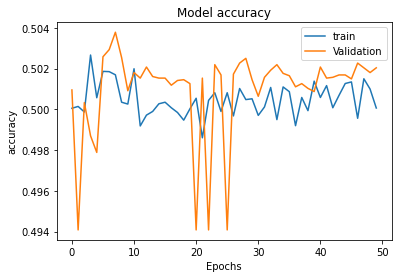

In [ ]:
score = model.evaluate(x_test, y_test,verbose=0)
print('Sai so kiem tra la:', score[0])
print('Do chinh xac kiem tra la:', score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','Validation'])
plt.show()

In [ ]:
model.save('Robot2b.h5')
from tensorflow.keras.models import load_model
model = load_model('Robot2b.h5')

In [ ]:
model.evaluate (x_train, y_train)

2415/2415 [==============================] - 8s 3ms/step - loss: -2432683737088.0000 - accuracy: 0.5013


[-2432683737088.0, 0.5012810826301575]